In [173]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [174]:
df = pd.read_csv('ford.csv')

In [175]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [176]:
df.shape

(17966, 9)

In [177]:
df.info

<bound method DataFrame.info of          model  year  price transmission  mileage fuelType  tax   mpg  \
0       Fiesta  2017  12000    Automatic    15944   Petrol  150  57.7   
1        Focus  2018  14000       Manual     9083   Petrol  150  57.7   
2        Focus  2017  13000       Manual    12456   Petrol  150  57.7   
3       Fiesta  2019  17500       Manual    10460   Petrol  145  40.3   
4       Fiesta  2019  16500    Automatic     1482   Petrol  145  48.7   
...        ...   ...    ...          ...      ...      ...  ...   ...   
17961    B-MAX  2017   8999       Manual    16700   Petrol  150  47.1   
17962    B-MAX  2014   7499       Manual    40700   Petrol   30  57.7   
17963    Focus  2015   9999       Manual     7010   Diesel   20  67.3   
17964       KA  2018   8299       Manual     5007   Petrol  145  57.7   
17965    Focus  2015   8299       Manual     5007   Petrol   22  57.7   

       engineSize  
0             1.0  
1             1.0  
2             1.0  
3          

In [178]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [179]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

# EDA

<Axes: xlabel='price', ylabel='Count'>

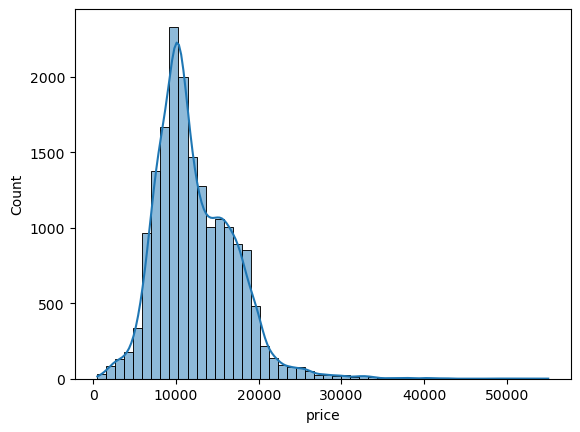

In [180]:
sns.histplot(df['price'],bins = 50,kde =True)

<Axes: >

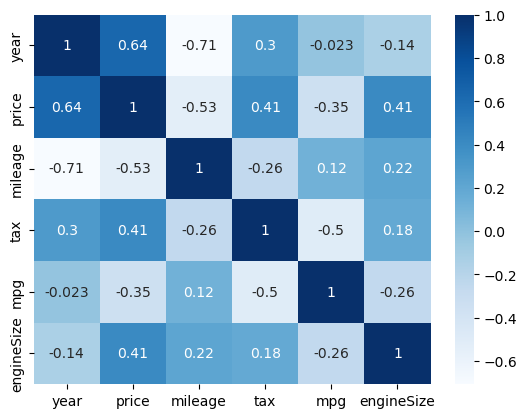

In [181]:
sns.heatmap(df.corr( numeric_only = True),annot =True,cmap = 'Blues')

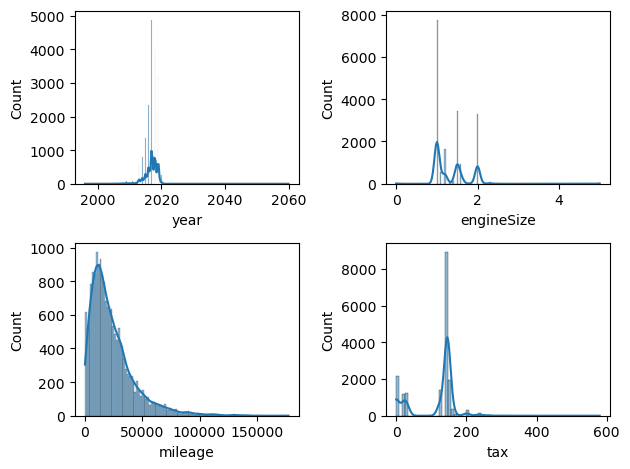

In [182]:
def plotting(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var], kde = True )
plotting('year',1)
plotting('engineSize',2)
plotting('mileage',3)
plotting('tax',4)

plt.tight_layout()

<Axes: xlabel='mileage', ylabel='price'>

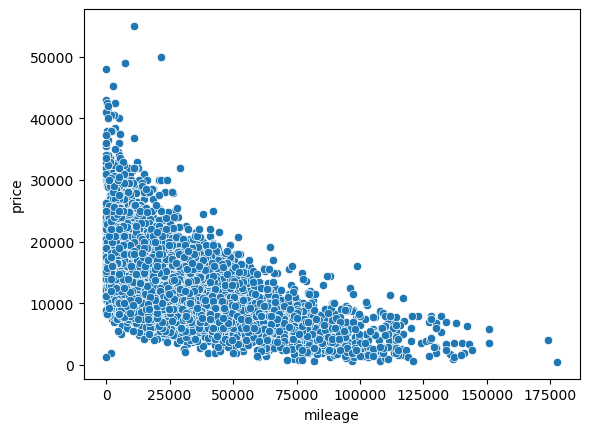

In [183]:
sns.scatterplot(data = df, x = 'mileage',y = 'price')

<Axes: xlabel='engineSize', ylabel='price'>

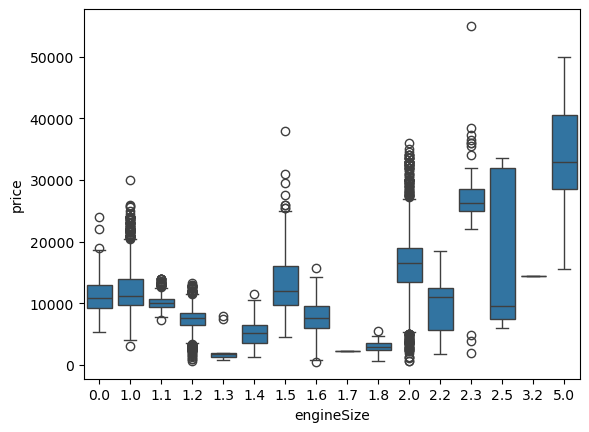

In [184]:
sns.boxplot(data = df , x = 'engineSize' , y = 'price')

<Axes: xlabel='transmission', ylabel='price'>

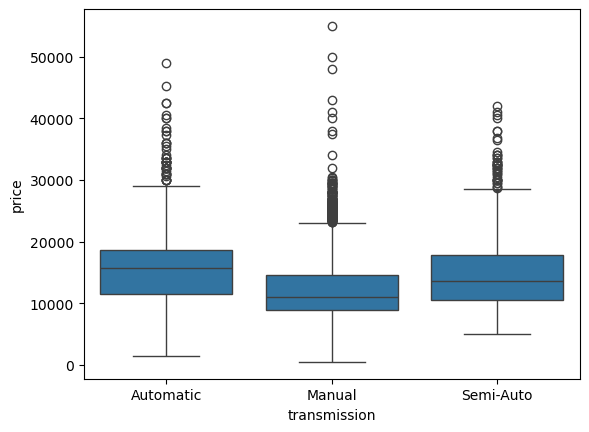

In [185]:
sns.boxplot(data = df , x = 'transmission' , y = 'price')
#according to the graph there is not much diffference for the 3 types of transmission wrt price

<Axes: xlabel='transmission', ylabel='count'>

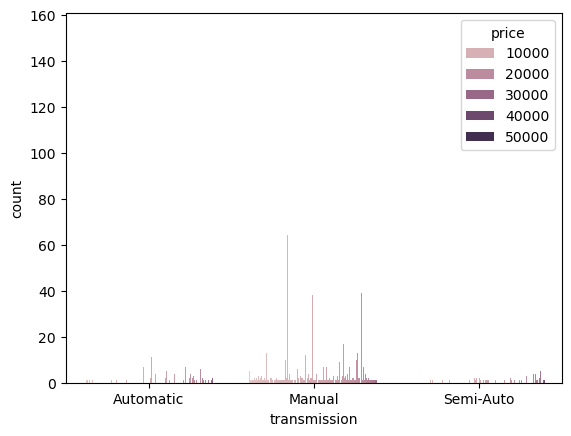

In [186]:
sns.countplot(x = df['transmission'] , hue = df['price'])

<Axes: xlabel='fuelType', ylabel='price'>

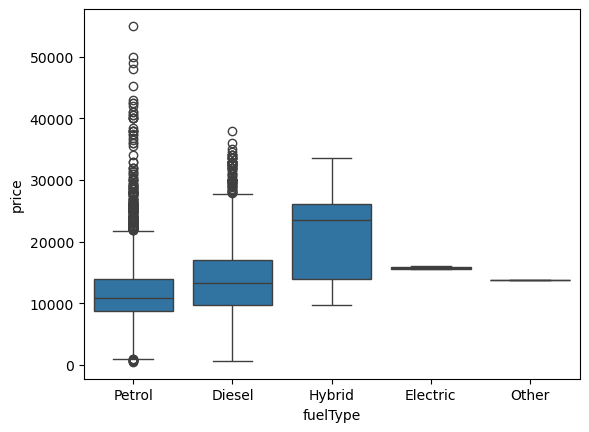

In [187]:
sns.boxplot(data = df , x = 'fuelType' , y = 'price')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, ' Fiesta'),
  Text(1, 0, ' Focus'),
  Text(2, 0, ' Puma'),
  Text(3, 0, ' Kuga'),
  Text(4, 0, ' EcoSport'),
  Text(5, 0, ' C-MAX'),
  Text(6, 0, ' Mondeo'),
  Text(7, 0, ' Ka+'),
  Text(8, 0, ' Tourneo Custom'),
  Text(9, 0, ' S-MAX'),
  Text(10, 0, ' B-MAX'),
  Text(11, 0, ' Edge'),
  Text(12, 0, ' Tourneo Connect'),
  Text(13, 0, ' Grand C-MAX'),
  Text(14, 0, ' KA'),
  Text(15, 0, ' Galaxy'),
  Text(16, 0, ' Mustang'),
  Text(17, 0, ' Grand Tourneo Connect'),
  Text(18, 0, ' Fusion'),
  Text(19, 0, ' Ranger'),
  Text(20, 0, ' Streetka'),
  Text(21, 0, ' Escort'),
  Text(22, 0, ' Transit Tourneo'),
  Text(23, 0, 'Focus')])

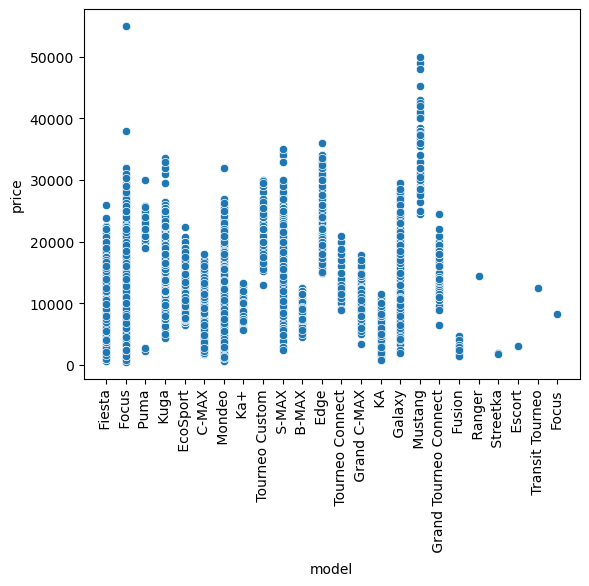

In [188]:
sns.scatterplot(data = df , x = 'model' , y = 'price')
plt.xticks(rotation = 90)

<Axes: xlabel='mpg', ylabel='price'>

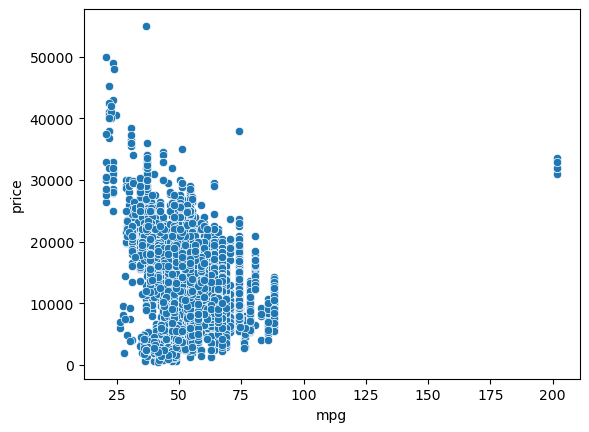

In [189]:
sns.scatterplot(data = df , x = 'mpg' , y = 'price')

<Axes: xlabel='tax', ylabel='price'>

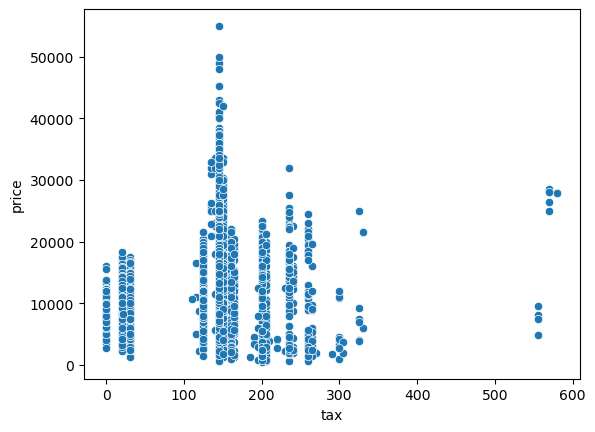

In [190]:
sns.scatterplot(data = df , x = 'tax' , y = 'price')


# Data cleaning and preprocessing

In [191]:
X = df.drop(columns = 'price' ,axis = 1)
y = df['price']

In [192]:
X.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,Automatic,1482,Petrol,145,48.7,1.0


In [193]:
#now we are maming 2 differnnt models with 2 different types of encoding
#1 one hot encoding 
X1_encode = pd.get_dummies(X,columns = ['model','transmission','fuelType'],drop_first = True)

In [194]:
X1_encode = X1_encode.astype(int)
X1_encode.head()

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,15944,150,57,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2018,9083,150,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2017,12456,150,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2019,10460,145,40,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,2019,1482,145,48,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [195]:
#we are using normal encoding here 
from sklearn.preprocessing import LabelEncoder

# Make a proper copy
Xlabel = X.copy()

# Categorical columns
columns = ['model', 'transmission', 'fuelType']

for col in columns:
    le = LabelEncoder() # remember to define this here in for loop and not outside
    Xlabel[col] = le.fit_transform(
        Xlabel[col].astype(str)
    )

In [196]:
Xlabel.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,0,15944,4,150,57.7,1.0
1,6,2018,1,9083,4,150,57.7,1.0
2,6,2017,1,12456,4,150,57.7,1.0
3,5,2019,1,10460,4,145,40.3,1.5
4,5,2019,0,1482,4,145,48.7,1.0


In [197]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [198]:
#standardizing the one head encoding data
# the encoded cols are already in 0 and 1 thus only the other numeric cols must be standardize

numeric_cols = ['year','mileage','tax','mpg','engineSize']
X1_encode[numeric_cols] = scaler.fit_transform(X1_encode[numeric_cols])

Xlabel = scaler.fit_transform(Xlabel)

In [199]:
Xlabel.columns

Index(['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize'],
      dtype='object')

In [200]:
cols = ['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize']
Xlabel[cols]= scaler.fit_transform(Xlabel[cols])

In [201]:
Xlabel.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,-0.460699,0.065128,-2.670032,-0.380998,0.688777,0.591358,-0.020442,-0.811386
1,-0.211477,0.552866,0.041351,-0.733359,0.688777,0.591358,-0.020442,-0.811386
2,-0.211477,0.065128,0.041351,-0.560132,0.688777,0.591358,-0.020442,-0.811386
3,-0.460699,1.040605,0.041351,-0.662640,0.688777,0.510727,-1.738890,0.345070
4,-0.460699,1.040605,-2.670032,-1.123724,0.688777,0.510727,-0.909294,-0.811386


# MODEL TRAINING AND TEST (ONE HOT ENCODING)

In [202]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X1_encode, y, test_size=0.33, random_state=42)


In [204]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [205]:
y_pred = model.predict(X_test)

In [206]:
y_pred

array([ 6888.75487917,  9328.62297666,  9420.53085767, ...,
       19099.96373064,  4948.44438264, 10424.59544227])

In [207]:
y_test

17610     6995
7076      8999
1713      7998
1611      5491
16830     3790
         ...  
6015     19000
10301    10940
15006    21999
5396      6995
6087     10299
Name: price, Length: 5929, dtype: int64

In [208]:
r2 = r2_score(y_test,y_pred)
r2

0.8396626991294075

In [209]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1-((1-r2)*(n-1)/(n-p-1))
adjusted_r2

0.838737780868532

In [210]:
X_train, X_test, y_train, y_test = train_test_split(Xlabel, y, test_size=0.33, random_state=42)


In [211]:
model2 = LinearRegression()
model2.fit(X_train,y_train)

LinearRegression()

In [213]:
y_pred = model2.predict(X_test)

In [214]:
y_pred

array([ 6157.52473246,  9286.53653694,  9519.82817502, ...,
       19580.21385231,  7384.33202962,  9960.74790235])

In [215]:
y_test

17610     6995
7076      8999
1713      7998
1611      5491
16830     3790
         ...  
6015     19000
10301    10940
15006    21999
5396      6995
6087     10299
Name: price, Length: 5929, dtype: int64

In [216]:
r2 = r2_score(y_test,y_pred)
r2

0.7310215557391141

In [217]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1-((1-r2)*(n-1)/(n-p-1))
adjusted_r2

0.7306580713549777

In [ ]:
# we made 2 different models by diff type of encoding
# we can see that one hot encoding is more efficient then normal encoding